# Title: Financial Trends of Australia vs USA
-------------------------------------------

## Team Members (team 5)
-------------------

Chan, Alphonsus;
Flascas, Mark;
Kyaw, Khin;
Nasar, Usama bin

## Project Description / Outline
-----------------------------

1) Compare and contrast the US and Australian markets driven by inflation as well as the impact on wage growth.

2) Analyse the relationship between inflation and indicators such as oil prices and wage growth in Australia and the US.

Research Questions to Answer
----------------------------

1) Explore relationships - is Australia following the US economically?

2) Relationship between the US and Australian inflation.

3) Relationship between the US and Australian wage growth to inflation.

4) What is the impact of oil prices on inflation in the US and Australia?

In [1]:
# importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import requests

# Import the NASDAQ API key
from api_key import key

## Inflation
Inflation is an increase of costs faced. Typically, prices rise over time; inflation is the measure of how quickly those prices are rising and falling.

Most people are familiar with CPI (Consumer Price Index), based on a basket of goods and services consumed by households, weighted accordingly.

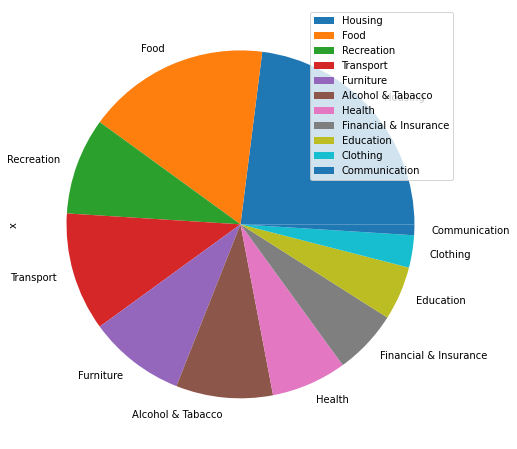

In [2]:
# --- Dataset 1: just # values for # groups:
df = pd.DataFrame([23,17,9,11,9,9,7,6,5,3,1], index=['Housing', 'Food', 'Recreation', 'Transport', 'Furniture', 'Alcohol & Tabacco', 'Health', 'Financial & Insurance', 'Education', 'Clothing', 'Communication'], columns=['x'])

# Make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.show()

## Datasets to be Used
-------------------

1. The Organisation for Economic Co-operation and Development (OECD)

2. Nasdaq (US) - API (Oil prices)

3. RBA (AU) - rba.gov.au (Understanding Inflation)

In [3]:
# Study data files
an_wage_path = "data/oecd_av_wage_1990 - 2021_annual_au_us.csv"
cpi_path = "data/oecd_cpi.csv"

# Read data files into dataframes
an_wage_df = pd.read_csv(an_wage_path)
cpi_df = pd.read_csv(cpi_path)

# Drop unwanted rows
clean_an_wage_df = an_wage_df.iloc[0:64]

# Drop unwanted columns
selected_columns = ['Country', 'Time', 'Unit Code', 'Value']
clean_an_wage_df = clean_an_wage_df[selected_columns]
clean_cpi_df = cpi_df[selected_columns]

# Change column name
clean_an_wage_df = clean_an_wage_df.rename(columns={'Value':'Annual Wage(Avg.)'})
clean_cpi_df = clean_cpi_df.rename(columns={'Value':'CPI'})

# Merge dataframes
dataset = pd.merge(clean_an_wage_df, clean_cpi_df, on=['Country', 'Time'])

# Remove decimal of Annual Wage column 
dataset.loc[:,'Annual Wage(Avg.)'] = dataset.loc[:,'Annual Wage(Avg.)'].astype(int)

# Making two seperate Data Frames, 1 each for Australia and US
au_df = dataset.loc[dataset['Country'] == 'Australia']
us_df = dataset.loc[dataset['Country'] == 'United States']

# Printing Complete Data Frame
print(dataset.to_string())

          Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI
0       Australia  1990         AUD              33030          PC  7.333022
1       Australia  1991         AUD              34096          PC  3.176675
2       Australia  1992         AUD              35438          PC  1.012231
3       Australia  1993         AUD              36516          PC  1.753653
4       Australia  1994         AUD              37344          PC  1.969635
5       Australia  1995         AUD              38243          PC  4.627767
6       Australia  1996         AUD              40124          PC  2.615385
7       Australia  1997         AUD              41921          PC  0.224887
8       Australia  1998         AUD              43097          PC  0.860135
9       Australia  1999         AUD              44579          PC  1.483129
10      Australia  2000         AUD              46246          PC  4.457435
11      Australia  2001         AUD              48315          PC  4.407135

## Inflation and Annual Average Income
-------------------

In [4]:
# Calculate relative Cumulative CPI since 1990 (Note: this is assuming cumulative CPI in 1989 = 0)

# For AU
# Getting the CPI column
au_CPI_sr = au_df.loc[:,"CPI"].astype(float)

# Calculating cumulative CPI for each year and adding them to a new column
CPI_cumu_list1 = []
total1 = 0
for i in au_CPI_sr:
    total1 += i
    CPI_cumu_list1.append(total1)
au_df["CPI Cumulative"] = CPI_cumu_list1

# Printing AU Data Frame
print(au_df)

# For US
# Getting the CPI column
us_CPI_sr = us_df.loc[:,"CPI"].astype(float)

# Calculating cumulative CPI for each year and adding them to a new column
CPI_cumu_list2 = []
total2 = 0
for i in us_CPI_sr:
    total2 += i
    CPI_cumu_list2.append(total2)
us_df["CPI Cumulative"] = CPI_cumu_list2

# Printing US Data Frame
print(us_df)

      Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
0   Australia  1990         AUD              33030          PC  7.333022   
1   Australia  1991         AUD              34096          PC  3.176675   
2   Australia  1992         AUD              35438          PC  1.012231   
3   Australia  1993         AUD              36516          PC  1.753653   
4   Australia  1994         AUD              37344          PC  1.969635   
5   Australia  1995         AUD              38243          PC  4.627767   
6   Australia  1996         AUD              40124          PC  2.615385   
7   Australia  1997         AUD              41921          PC  0.224887   
8   Australia  1998         AUD              43097          PC  0.860135   
9   Australia  1999         AUD              44579          PC  1.483129   
10  Australia  2000         AUD              46246          PC  4.457435   
11  Australia  2001         AUD              48315          PC  4.407135   
12  Australi

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


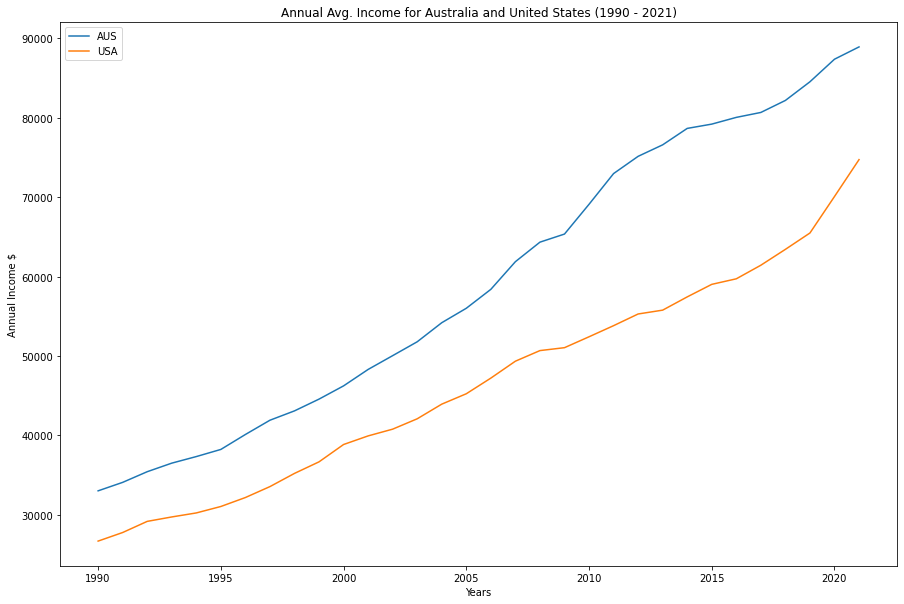

In [5]:
# Plot Australia vs US average annual wage on 1 graph

ax = au_df.plot(x='Time', y='Annual Wage(Avg.)', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='Annual Wage(Avg.)', label="USA" )
plt.ylabel('Annual Income $')
plt.xlabel('Years')
plt.title('Annual Avg. Income for Australia and United States (1990 - 2021)')
plt.legend()
plt.show()

US and AU wage growths have a positive relationship, with Australia's wage growth showing signs of life. Australia's wage growth is at 3.1% annually (November 2022). 

We can see the impact of 2008-09 financial crisis on US wage growth which kept the US wage growth from keeping its previous % increase around 2009. 

The US annual wage increases more rapidly than Australia's in around 2019-21. 

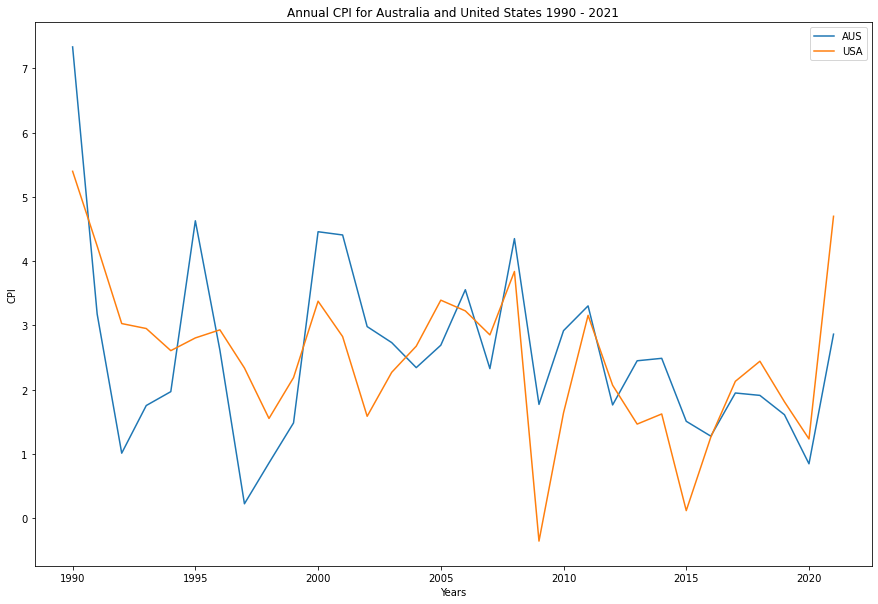

In [6]:
# Plot Australia vs US CPI on 1 graph

ax = au_df.plot(x='Time', y='CPI', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='CPI', label="USA" )
plt.ylabel('CPI')
plt.xlabel('Years')
plt.title('Annual CPI for Australia and United States 1990 - 2021')
plt.legend()
plt.show()

Australian inflation trend is very similar to that of the US inflation. The latest Australian CPI index is 7.3% annually in November 2022, as compared to Australia's wage growth of 3.1%. Therefore, most Australians are seeing a decline in purchasing power.

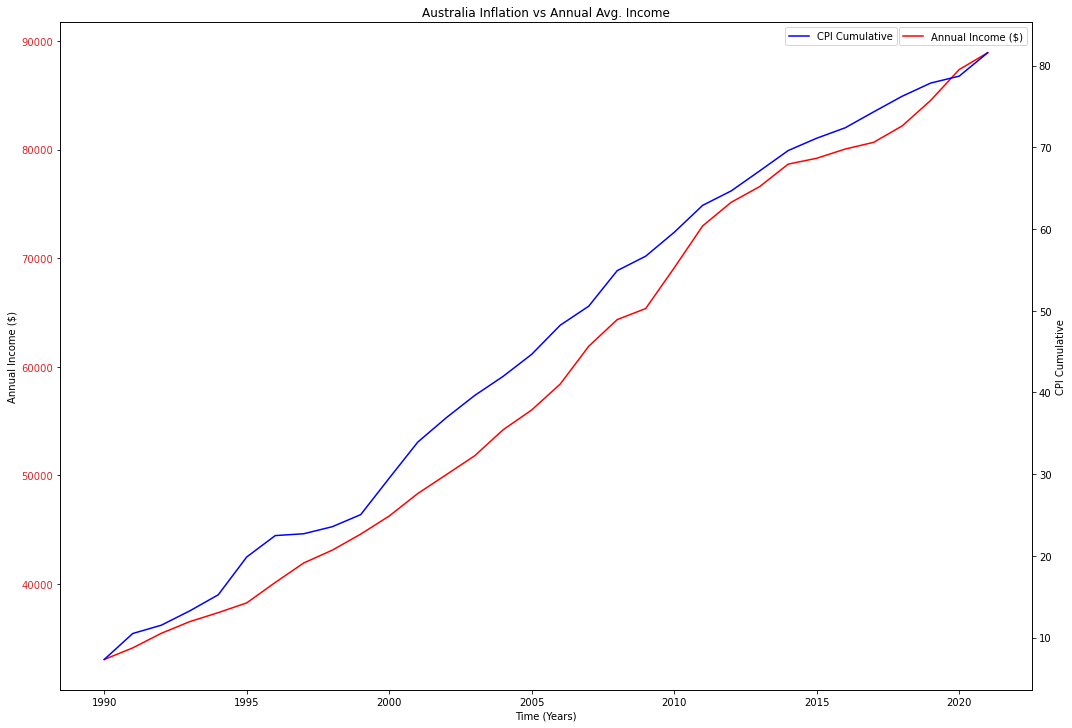

In [7]:
# Australia relative cumulative CPI vs Annual Avg. Income

# Assigning columns
y2 = au_df["CPI Cumulative"]
x2 = au_df["Annual Wage(Avg.)"]
x1 = au_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Adding labels of each axis
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')

ax1.plot(x1, x2, color='r')

# Adding tick parameters and colour to the y-axis for Annual Avg. Income
color = 'tab:red'
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for Annual Avg. Income
label2=['Annual Income ($)']
plt.legend(label2, loc="best")

# Plotting on 2 different y-axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI Cumulative
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI Cumulative and graph title
label1=['CPI Cumulative']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('Australia Inflation vs Annual Avg. Income')
plt.show()

Australian annual wage growth increases along with inflation.

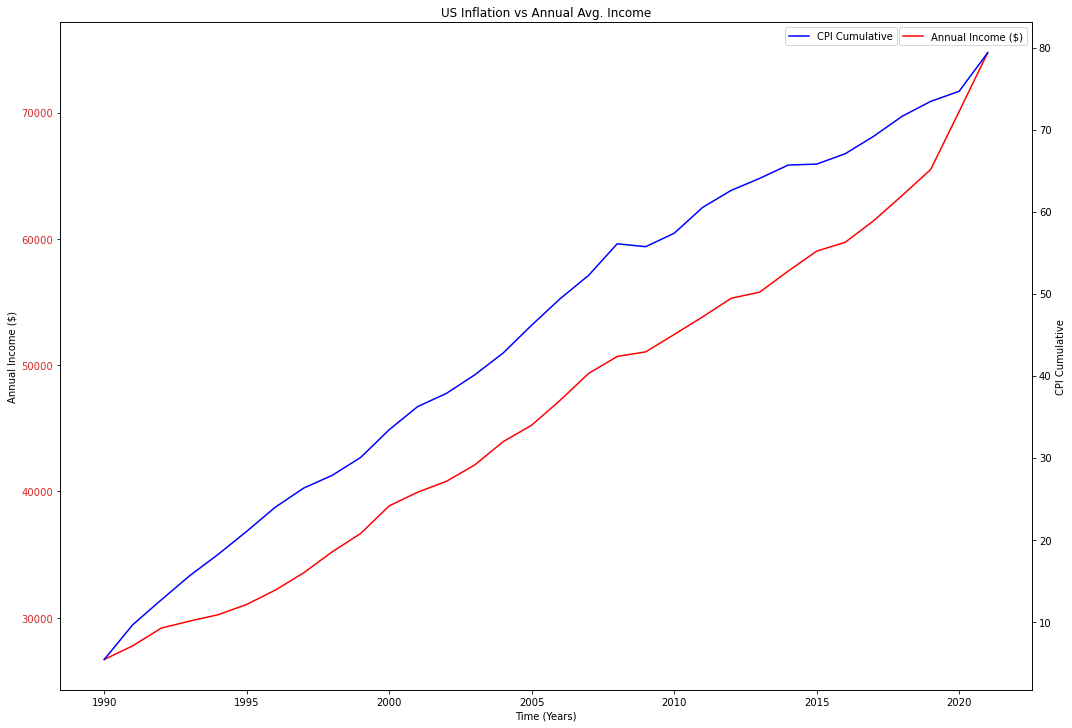

In [8]:
# US relative cumulative CPI vs Annual Avg. Income

# Assigning columns
y2 = us_df["CPI Cumulative"]
x2 = us_df["Annual Wage(Avg.)"]
x1 = us_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Adding labels on each axis
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')

ax1.plot(x1, x2, color='r')

# Adding tick parameters and colour to the y-axis for Annual Avg. Income
color = 'tab:red'
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for Annual Avg. Income
label2=['Annual Income ($)']
plt.legend(label2, loc="best")

# Plotting on 2 different y-axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI Cumulative
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI Cumulative and graph title
label1=['CPI Cumulative']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US Inflation vs Annual Avg. Income')
plt.show()

Same as in Australia, annual income as well as inflation in the US has increased over time. However, it is interesting to see that the rise of annual income had been relatively gradual until 2020 but has become steeper after that period.

## Inflation and Oil Prices
-------------------

In [9]:
# Trimming the AU and US Data Frame to get values from Years 2003 to 2021

trim_AU_df = au_df.loc[au_df["Time"]>=2003]
trim_AU_df = trim_AU_df.rename(columns={'Time':'year'})
print(trim_AU_df)

trim_US_df = us_df.loc[us_df["Time"]>=2003]
trim_US_df = trim_US_df.rename(columns={'Time':'year'})
print(trim_US_df)

      Country  year Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
13  Australia  2003         AUD              51798          PC  2.732596   
14  Australia  2004         AUD              54199          PC  2.343255   
15  Australia  2005         AUD              56018          PC  2.691832   
16  Australia  2006         AUD              58402          PC  3.555288   
17  Australia  2007         AUD              61884          PC  2.327611   
18  Australia  2008         AUD              64343          PC  4.350298   
19  Australia  2009         AUD              65362          PC  1.771117   
20  Australia  2010         AUD              69110          PC  2.918340   
21  Australia  2011         AUD              72978          PC  3.303850   
22  Australia  2012         AUD              75149          PC  1.762780   
23  Australia  2013         AUD              76598          PC  2.449889   
24  Australia  2014         AUD              78666          PC  2.487923   
25  Australi

In [10]:
# Using NASDAQ API to fetch global oil prices

url = f"https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.json?api_key={key}"

# Making a request to the url and storing in response variable
response = requests.get(url).json()

# Making a Data Frame of the response
oil_df = pd.DataFrame.from_dict(response)

# Grab the Data values, assign them to a new Data Frame and name the columns
new_dataset = pd.DataFrame(oil_df['dataset']['data'],columns=['date','oil_price'])

# Grab the year values and assign them to a new column
new_dataset['year'] = new_dataset['date'].str[0:4].astype(int)

# Using groupby() function to group by years and calculating the mean of oil prices for each year
grouped_df = new_dataset.groupby(['year']).mean()

# Dropping the last 2 years (2022 & 2023) from the data set
new_df = grouped_df.iloc[0:19,:]

# Merging the Data Frames to add Oil Prices
final_US_oil_df = pd.merge(trim_US_df, new_df, on=['year'])
final_AU_oil_df = pd.merge(trim_AU_df, new_df, on=['year'])

print(final_AU_oil_df)
print(final_US_oil_df)

      Country  year Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
0   Australia  2003         AUD              51798          PC  2.732596   
1   Australia  2004         AUD              54199          PC  2.343255   
2   Australia  2005         AUD              56018          PC  2.691832   
3   Australia  2006         AUD              58402          PC  3.555288   
4   Australia  2007         AUD              61884          PC  2.327611   
5   Australia  2008         AUD              64343          PC  4.350298   
6   Australia  2009         AUD              65362          PC  1.771117   
7   Australia  2010         AUD              69110          PC  2.918340   
8   Australia  2011         AUD              72978          PC  3.303850   
9   Australia  2012         AUD              75149          PC  1.762780   
10  Australia  2013         AUD              76598          PC  2.449889   
11  Australia  2014         AUD              78666          PC  2.487923   
12  Australi

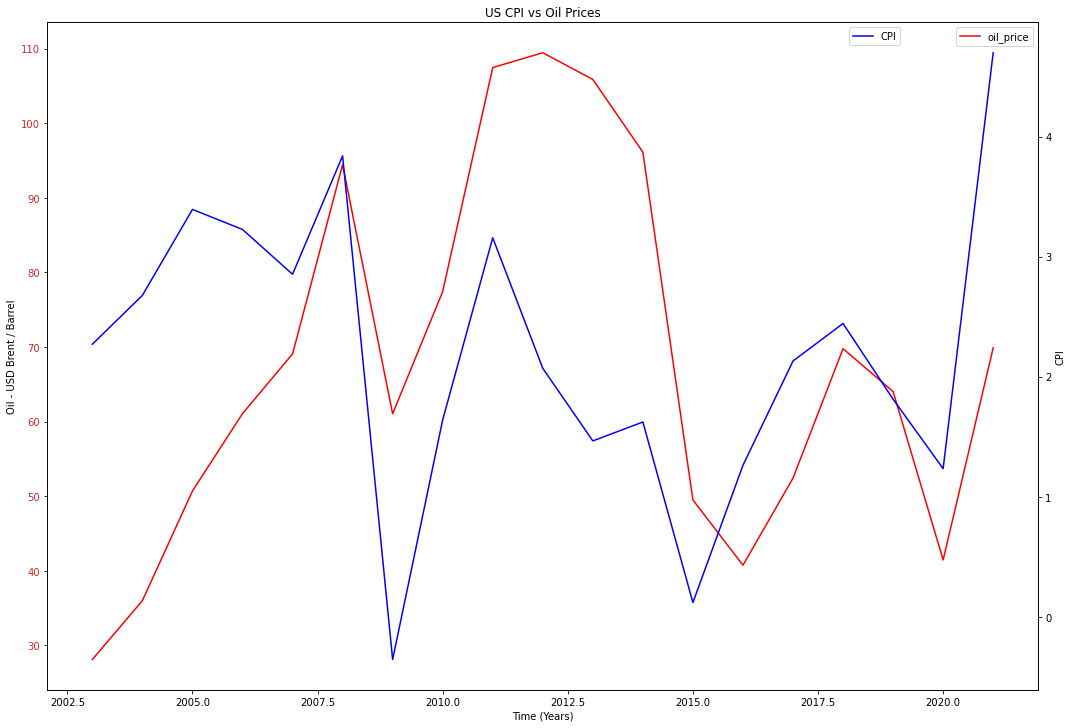

In [11]:
# US inflation rate vs global oil prices graph

# Assigning columns
y2 = final_US_oil_df["CPI"]
x2 = final_US_oil_df["oil_price"]
x1 = final_US_oil_df["year"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Assigning labels to axes
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Oil - USD Brent / Barrel')

ax1.plot(x1, x2, color='r')

# Adding tick parameters and color to the y-axis for oil price
color = 'tab:red'
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for oil price
label2=['oil_price']
plt.legend(label2, loc="best")

# Plotting on 2 different axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI and graph title
label1=['CPI']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US CPI vs Oil Prices')
plt.show()

This graph compares US inflation rate and oil prices over the last two decades. It is quite distinctive that the changes in oil prices have quite similar pattern as the changes in CPI. This shows that US inflation depends on the variation in oil prices and any changes in oil prices have major influence over inflation and its economy.

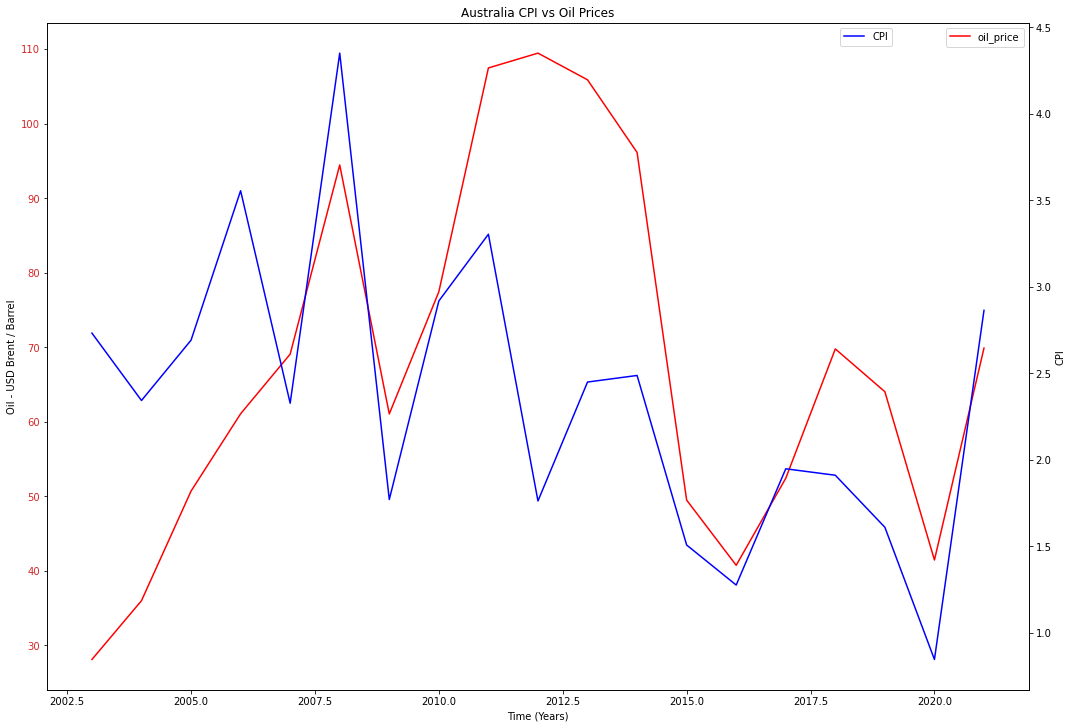

In [12]:
# Australian inflation rate vs global oil prices graph

# Assigning columns
y2 = final_AU_oil_df["CPI"]
x2 = final_AU_oil_df["oil_price"]
x1 = final_AU_oil_df["year"]

fig, ax1 = plt.subplots(figsize = (15,10))

# Assigning labels to axes
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Oil - USD Brent / Barrel')

ax1.plot(x1, x2, color='r')

# Adding tick parameters and color to the y-axis for oil price
color = 'tab:red'
ax1.tick_params(axis='y', labelcolor=color)

# Adding legend for oil price
label2=['oil_price']
plt.legend(label2, loc="best")

# Plotting on 2 different axes
ax2 = ax1.twinx()

ax2.set_ylabel('CPI')

ax2.plot(x1, y2, color='b')

# Adding tick parameters for CPI
ax2.tick_params(axis='y')

fig.tight_layout()

# Adding legend for CPI and graph title
label1=['CPI']
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('Australia CPI vs Oil Prices')
plt.show()

Just as in the US, oil prices and Australia's inflation rate are closely related; changes in oil prices drive dramatic changes in inflation.

Generally, CPI in Australia follows the level of oil prices. However, there is an interesting period between around 2010 and 2011 in which CPI was declining sharply while oils prices were relatively static, and another period between around 2012 and 2014 in which CPI was increasing while oil prices were decreasing. It will be great to research what other factors/industries were contributing to such changes in CPI during these periods.

# Summary
-------
1) Q: What is the relationship between the US and Australian inflation?
A: They follow a similar pattern.

2) Q: What is the relationship between the US and Australian wage growth to inflation?
A: Both US and Australian wage growths follow the trends of inflation but have lagged behind historically.

3) Q: Do global oil prices affect inflation in the US and Australia?
A: As it is clear in the CPI vs oil prices charts above, the global oil prices do influence the inflation rate in both the US and Australia. If oil prices go up, the inflation rate follow suit and go up. The converse is also true.

4) Q: Does Australian economy follow the pattern of the US economy?
A: The patterns of wage growth and inflation in both countries are very similar. Also, oil prices affect inflation in both countries in similar patterns. So we can say that YES, the Australian economy does follow the patterns of the US economy.